<a href="https://colab.research.google.com/github/Serena-G-LEE/25-2_Project/blob/main/Author_Scrapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Drive를 마운트하고 파일 경로를 확인

In [ ]:
# 셀 1: Google Drive 마운트 및 파일 경로 확인
from google.colab import drive
import os
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')

# 디렉토리 구조 확인
def explore_directory(path, level=0, max_level=2):
    """디렉토리 구조 탐색"""
    try:
        items = os.listdir(path)
        for item in items[:15]:  # 처음 15개만 출력
            item_path = os.path.join(path, item)
            if os.path.isdir(item_path):
                print("  " * level + f"📁 {item}")
                if level < max_level:
                    explore_directory(item_path, level + 1, max_level)
            else:
                if item.endswith('.csv'):
                    print("  " * level + f"📄 {item} (CSV)")
                else:
                    print("  " * level + f"📄 {item}")
    except Exception as e:
        print("  " * level + f"❌ 접근 불가: {e}")

# 기본 경로에서 시작
base_path = '/content/drive/MyDrive/6. 덕성여자대학교/25학년도 2학기/비정형데이터분석/프로젝트'
print("디렉토리 구조 탐색 중...")
explore_directory(base_path)

Mounted at /content/drive
디렉토리 구조 탐색 중...
📁 openalex_top10000_2025_with_authors
  📄 institutions_mapping.csv (CSV)
  📄 works_top10000_2025_Duksung_Women's_University.csv (CSV)
  📄 works_top10000_2025_Seoul_National_University.csv (CSV)
  📄 works_top10000_2025_Korea_University.csv (CSV)
  📄 works_top10000_2025_Yonsei_University.csv (CSV)
  📄 works_top10000_2025_Korea_Advanced_Institute_of_Science_and_Technology.csv (CSV)
  📄 works_top10000_2025_Sogang_University.csv (CSV)
  📄 works_top10000_2025_Sungkyunkwan_University.csv (CSV)
  📄 works_top10000_2025_Hanyang_University.csv (CSV)
  📄 works_top10000_2025_Pohang_University_of_Science_and_Technology.csv (CSV)
  📄 works_top10000_2025_Gwangju_Institute_of_Science_and_Technology.csv (CSV)
  📄 works_top10000_2025_Daegu_Gyeongbuk_Institute_of_Science_and_Technology.csv (CSV)
  📄 works_top10000_2025_Ulsan_National_Institute_of_Science_and_Technology.csv (CSV)
  📄 works_top10000_2025_Chung-Ang_University.csv (CSV)
  📄 works_top10000_2025_Kyung_H

CSV 파일을 찾고 데이터를 로드

In [ ]:
# 셀 2: CSV 파일 검색 및 데이터 로드
import glob

# CSV 파일 검색
print("CSV 파일 검색 중...")
csv_files = glob.glob('/content/drive/MyDrive/6. 덕성여자대학교/25학년도 2학기/비정형데이터분석/프로젝트/**/*.csv', recursive=True)

print(f"찾은 CSV 파일 수: {len(csv_files)}")

# Seoul National University 관련 파일 필터링
snul_files = []
for file_path in csv_files:
    if 'ALL.cleaned' in file_path or '서울' in file_path:
        snul_files.append(file_path)
        print(f"✅ {file_path}")

# 파일 로드 시도
if snul_files:
    print("\n파일 로드 시도...")
    for file_path in snul_files:
        try:
            df = pd.read_csv(file_path)
            print(f"✅ 성공: {file_path}")
            print(f"   데이터 shape: {df.shape}")
            break
        except Exception as e:
            print(f"❌ 실패: {file_path} - {e}")
else:
    print("Seoul National University 관련 CSV 파일을 찾지 못했습니다.")

    # 모든 CSV 파일 목록 출력
    print("\n모든 CSV 파일 목록:")
    for i, file_path in enumerate(csv_files[:20]):  # 처음 20개만
        print(f"{i+1}. {file_path}")

CSV 파일 검색 중...
찾은 CSV 파일 수: 750
✅ /content/drive/MyDrive/6. 덕성여자대학교/25학년도 2학기/비정형데이터분석/프로젝트/openalex_data_cleaning_2011_with_authors/works_top10000_2011_ALL.cleaned.csv
✅ /content/drive/MyDrive/6. 덕성여자대학교/25학년도 2학기/비정형데이터분석/프로젝트/openalex_data_cleaning_2012_with_authors/works_top10000_2012_ALL.cleaned.csv
✅ /content/drive/MyDrive/6. 덕성여자대학교/25학년도 2학기/비정형데이터분석/프로젝트/openalex_data_cleaning_2013_with_authors/works_top10000_2013_ALL.cleaned.csv
✅ /content/drive/MyDrive/6. 덕성여자대학교/25학년도 2학기/비정형데이터분석/프로젝트/openalex_data_cleaning_2014_with_authors/works_top10000_2014_ALL.cleaned.csv
✅ /content/drive/MyDrive/6. 덕성여자대학교/25학년도 2학기/비정형데이터분석/프로젝트/openalex_data_cleaning_2015_with_authors/works_top10000_2015_ALL.cleaned.csv
✅ /content/drive/MyDrive/6. 덕성여자대학교/25학년도 2학기/비정형데이터분석/프로젝트/openalex_data

데이터를 확인하고 기본 정보를 출력

In [ ]:
# 셀 3: 데이터 확인 및 기본 정보 출력
try:
    print("데이터 기본 정보:")
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")

    print("\n첫 2행 미리보기:")
    display(df.head(2))

    print("\n컬럼별 데이터 타입:")
    print(df.dtypes)

    # 필요한 컬럼 존재 여부 확인
    required_columns = ['author_names', 'author_affiliations', 'authors_count']
    missing_columns = [col for col in required_columns if col not in df.columns]

    if missing_columns:
        print(f"\n⚠️  필요한 컬럼이 없습니다: {missing_columns}")
        print("사용 가능한 컬럼:")
        for col in df.columns:
            if 'author' in col.lower():
                print(f"  - {col}")
    else:
        print(f"\n✅ 필요한 컬럼이 모두 존재합니다")

except NameError:
    print("❌ 데이터프레임이 로드되지 않았습니다. 먼저 셀 2를 실행해주세요.")

데이터 기본 정보:
Shape: (43156, 34)
Columns: ['openalex_id', 'title', 'publication_year', 'publication_date', 'type', 'host_venue', 'cited_by_count', 'is_oa', 'oa_status', 'language', 'doi', 'abstract', 'authors_count', 'author_ids', 'author_names', 'author_positions', 'author_orcids', 'author_affiliations', 'query_name', 'display_name', 'institution_id', '_garbled_score', 'title_clean', 'host_venue_clean', 'language_clean', 'abstract_clean', 'author_ids_clean', 'author_names_clean', 'author_positions_clean', 'author_orcids_clean', 'author_affiliations_clean', 'query_name_clean', 'display_name_clean', 'institution_id_clean']

첫 2행 미리보기:


,openalex_id,title,publication_year,publication_date,type,host_venue,cited_by_count,is_oa,oa_status,language,...,language_clean,abstract_clean,author_ids_clean,author_names_clean,author_positions_clean,author_orcids_clean,author_affiliations_clean,query_name_clean,display_name_clean,institution_id_clean
0,https://openalex.org/W2141140503,Preclinical Development of the Novel Chk1 Inhi...,2011,2011-12-28,article,Molecular Cancer Therapeutics,116,True,bronze,en,...,en,Many anticancer agents damage DNA arrest cell ...,5061329302 5071213463 5005359924 5028131505 50...,Ryan Montano Injae Chung Kristen M Garner Davi...,first middle middle middle last,https orcid org 0000 0002 2902 4677 https orci...,Duksung Women University Duksung Women Univers...,Duksung Women University,Duksung Women University,65832422
1,https://openalex.org/W2029113385,Sphingosine 1-phosphate regulates matrix metal...,2011,2011-06-08,article,Journal of Cell Science,94,True,green,en,...,en,Recent evidence suggests inflammation involved...,5074700953 5022162975 5089461702 5070737817 50...,Eun Sook Kim Jong Sook Kim Sang Geon Kim Se Ji...,first middle middle middle middle last,https orcid org 0009 0003 6205 1794 https orci...,Duksung Women University Duksung Women Univers...,Duksung Women University,Duksung Women University,65832422



컬럼별 데이터 타입:
openalex_id                   object
title                         object
publication_year               int64
publication_date              object
type                          object
host_venue                    object
cited_by_count                 int64
is_oa                           bool
oa_status                     object
language                      object
doi                           object
abstract                      object
authors_count                  int64
author_ids                    object
author_names                  object
author_positions              object
author_orcids                 object
author_affiliations           object
query_name                    object
display_name                  object
institution_id                object
_garbled_score               float64
title_clean                   object
host_venue_clean              object
language_clean                object
abstract_clean                object
author_ids_clean         

데이터 전처리를 위한 함수들을 정의하는 셀

In [ ]:
# 셀 4: 데이터 전처리 함수 정의
import re
from collections import defaultdict

def extract_affiliations(affiliation_text):
    """저자 소속 텍스트를 파싱하여 개별 소속 리스트로 변환"""
    if pd.isna(affiliation_text):
        return []

    # 세미콜론으로 분리 (여러 소속이 있을 수 있음)
    affiliations = str(affiliation_text).split(';')

    # 각 소속 정제
    cleaned_affiliations = []
    for aff in affiliations:
        aff = aff.strip()
        if aff:
            # 괄호나 불필요한 정보 제거
            aff = re.sub(r'\([^)]*\)', '', aff)  # 괄호 내용 제거
            aff = re.sub(r'\[[^\]]*\]', '', aff)  # 대괄호 내용 제거
            aff = aff.strip()

            # 빈 문자열이 아니면 추가
            if aff:
                cleaned_affiliations.append(aff)

    return cleaned_affiliations

def extract_author_affiliation_pairs(author_names, author_affiliations):
    """저자 이름과 소속을 매칭"""
    if pd.isna(author_names) or pd.isna(author_affiliations):
        return []

    authors = str(author_names).split(';')
    affiliations_list = str(author_affiliations).split(';')

    pairs = []
    min_length = min(len(authors), len(affiliations_list))

    for i in range(min_length):
        author = authors[i].strip()
        aff_text = affiliations_list[i].strip()

        if author and aff_text:
            # 해당 저자의 소속들 추출
            author_affs = extract_affiliations(aff_text)
            for aff in author_affs:
                pairs.append((author, aff))

    return pairs

# 한국 주요 대학 목록
KOREAN_UNIVERSITIES = [
    '서울대학교', 'Seoul National University',
    '연세대학교', 'Yonsei University',
    '고려대학교', 'Korea University',
    '포항공과대학교', 'Pohang University of Science and Technology', 'POSTECH',
    '한국과학기술원', 'Korea Advanced Institute of Science and Technology', 'KAIST',
    '성균관대학교', 'Sungkyunkwan University',
    '한양대학교', 'Hanyang University',
    '서울시립대학교', 'University of Seoul',
    '서강대학교', 'Sogang University',
    '경희대학교', 'Kyung Hee University',
    '부산대학교', 'Pusan National University'
]

def identify_korean_university(affiliation):
    """소속에서 한국 대학 식별"""
    affiliation_lower = affiliation.lower()

    for univ in KOREAN_UNIVERSITIES:
        if univ.lower() in affiliation_lower:
            # 영어명과 한글명 매핑
            if 'seoul national' in univ.lower() or '서울대' in univ:
                return 'Seoul National University'
            elif 'yonsei' in univ.lower() or '연세대' in univ:
                return 'Yonsei University'
            elif 'korea university' in univ.lower() or '고려대' in univ:
                return 'Korea University'
            elif 'postech' in univ.lower() or '포항공과' in univ:
                return 'POSTECH'
            elif 'kaist' in univ.lower() or '한국과학기술원' in univ:
                return 'KAIST'
            elif 'sungkyunkwan' in univ.lower() or '성균관대' in univ:
                return 'Sungkyunkwan University'
            elif 'hanyang' in univ.lower() or '한양대' in univ:
                return 'Hanyang University'
            elif 'university of seoul' in univ.lower() or '서울시립대' in univ:
                return 'University of Seoul'
            elif 'sogang' in univ.lower() or '서강대' in univ:
                return 'Sogang University'
            elif 'kyung hee' in univ.lower() or '경희대' in univ:
                return 'Kyung Hee University'
            elif 'pusan national' in univ.lower() or '부산대' in univ:
                return 'Pusan National University'

    return None

# 함수 테스트
try:
    test_names = df.iloc[0]['author_names']
    test_affs = df.iloc[0]['author_affiliations']
    print("함수 테스트:")
    print(f"저자 이름: {test_names[:10000]}...")
    print(f"소속: {test_affs[:10000]}...")
    print("파싱 결과 (첫 3개):", extract_author_affiliation_pairs(test_names, test_affs)[:1000])
except:
    print("테스트 실패 - 데이터를 먼저 로드해주세요")

함수 테스트:
저자 이름: Ryan Montano;Injae Chung;Kristen M. Garner;David Parry;Alan Eastman...
소속: Duksung Women's University;Duksung Women's University;Duksung Women's University;Duksung Women's University;Duksung Women's University...
파싱 결과 (첫 3개): [('Ryan Montano', "Duksung Women's University"), ('Injae Chung', "Duksung Women's University"), ('Kristen M. Garner', "Duksung Women's University"), ('David Parry', "Duksung Women's University"), ('Alan Eastman', "Duksung Women's University")]


협력네트워크 구축

In [ ]:
# 셀 5: 협력 네트워크 구축
import networkx as nx
from tqdm import tqdm

def build_collaboration_network(df):
    """논문 데이터로부터 협력 네트워크 구축"""

    # 네트워크 그래프
    G = nx.Graph()
    collaboration_edges = defaultdict(int)

    # 각 논문별 처리
    for idx, row in tqdm(df.iterrows(), total=len(df), desc="논문 처리 중"):
        paper_id = row['openalex_id']
        author_pairs = extract_author_affiliation_pairs(row['author_names'], row['author_affiliations'])

        # 이 논문의 모든 기관 수집
        institutions_in_paper = set()

        for author, aff in author_pairs:
            korean_univ = identify_korean_university(aff)
            if korean_univ:
                institutions_in_paper.add(korean_univ)

        # 협력 관계 추가 (완전 그래프 - 같은 논문의 모든 기관이 서로 연결됨)
        institutions_list = list(institutions_in_paper)
        for i in range(len(institutions_list)):
            for j in range(i+1, len(institutions_list)):
                inst1, inst2 = institutions_list[i], institutions_list[j]
                edge = tuple(sorted([inst1, inst2]))
                collaboration_edges[edge] += 1

                # 그래프에 노드와 엣지 추가
                G.add_node(inst1)
                G.add_node(inst2)
                if G.has_edge(inst1, inst2):
                    G[inst1][inst2]['weight'] += 1
                else:
                    G.add_edge(inst1, inst2, weight=1)

    return G, collaboration_edges

# 협력 네트워크 구축
print("협력 네트워크 구축 중...")
G, collaboration_edges = build_collaboration_network(df)

print(f"네트워크 노드 수: {G.number_of_nodes()}")
print(f"네트워크 엣지 수: {G.number_of_edges()}")

# 노드 목록 출력
print("\n네트워크 노드 목록:")
for node in G.nodes():
    print(f"  - {node}")

협력 네트워크 구축 중...


논문 처리 중: 100%|██████████| 43156/43156 [00:04<00:00, 10611.28it/s]

네트워크 노드 수: 9
네트워크 엣지 수: 35

네트워크 노드 목록:
  - Seoul National University
  - Hanyang University
  - Kyung Hee University
  - Sungkyunkwan University
  - Pusan National University
  - Korea University
  - Yonsei University
  - Sogang University
  - University of Seoul


네트워크 시각화를 위한 셀

네트워크 시각화 중...


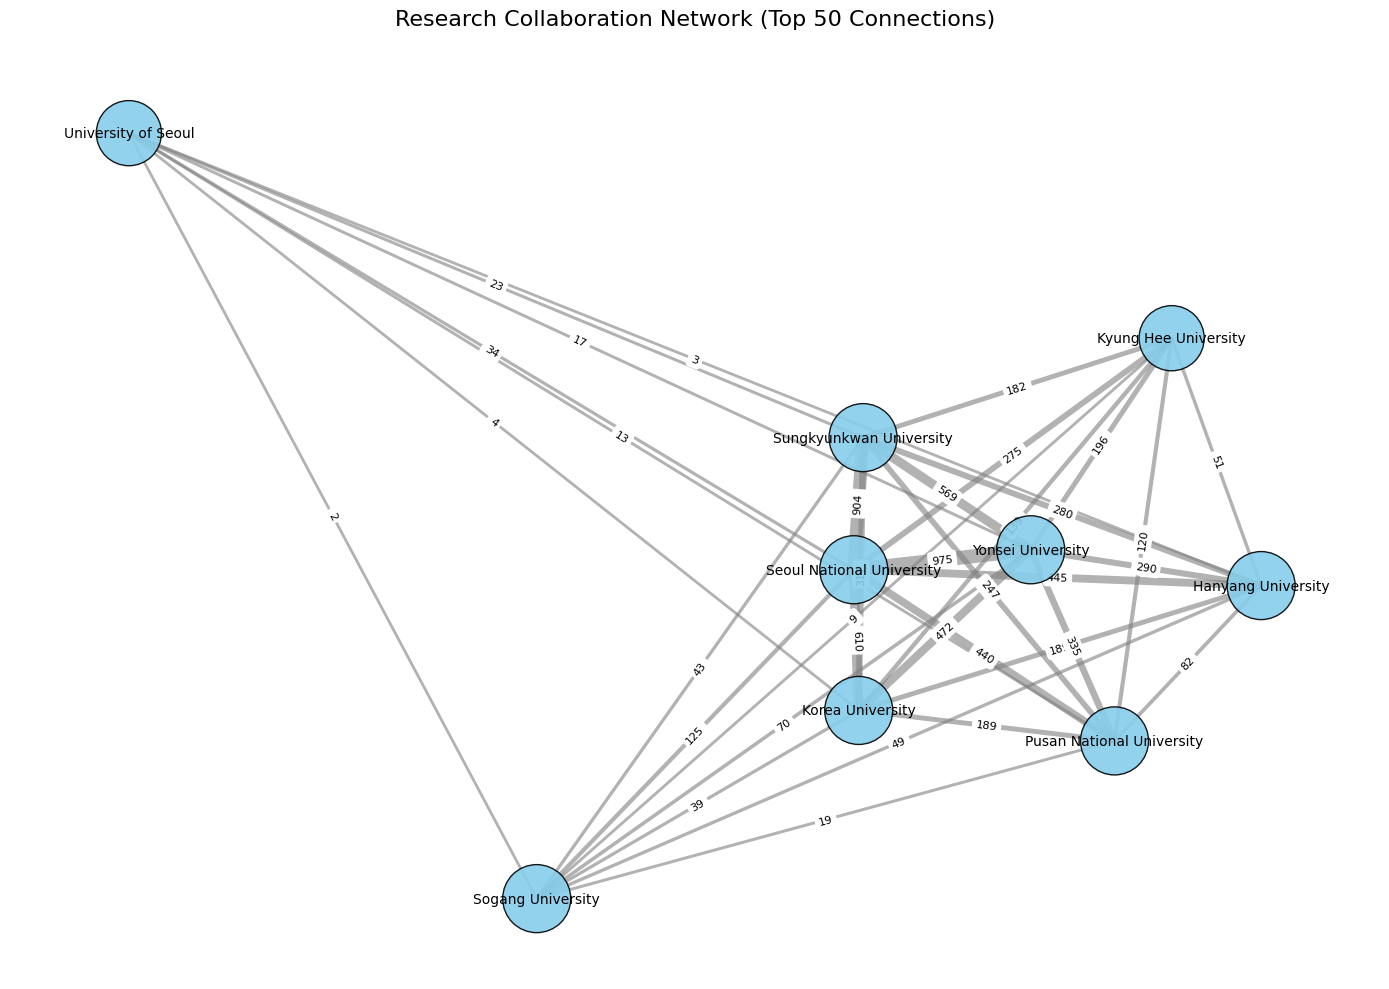

In [ ]:
# 셀 6: 네트워크 시각화
import matplotlib.pyplot as plt

def visualize_collaboration_network(G, top_n=30):
    """협력 네트워크 시각화"""

    if G.number_of_nodes() == 0:
        print("시각화할 노드가 없습니다.")
        return None

    # 가장 가중치가 큰 엣지 선택
    edges_with_weights = [(u, v, d['weight']) for u, v, d in G.edges(data=True)]
    edges_with_weights.sort(key=lambda x: x[2], reverse=True)

    # 상위 N개 엣지만 포함하는 서브그래프 생성
    top_edges = edges_with_weights[:top_n]
    nodes_in_top_edges = set()
    for u, v, w in top_edges:
        nodes_in_top_edges.add(u)
        nodes_in_top_edges.add(v)

    H = G.subgraph(nodes_in_top_edges)

    # 시각화 설정
    plt.figure(figsize=(14, 10))

    # 노드 위치 계산
    pos = nx.spring_layout(H, k=3, iterations=50)

    # 엣지 가중치에 따라 두께 설정
    edge_weights = [H[u][v]['weight'] for u, v in H.edges()]
    max_weight = max(edge_weights) if edge_weights else 1
    edge_widths = [2 + 8 * (w / max_weight) for w in edge_weights]

    # 노드 색상 설정 (Seoul National University는 특별히 표시)
    node_colors = []
    for node in H.nodes():
        if node == 'Seoul National University':
            node_colors.append('skyblue')  # 서울대학교
        else:
            node_colors.append('skyblue')  # 다른 기관

    # 노드 크기 설정 (연결 정도에 따라)
    node_sizes = [800 + 200 * H.degree(node) for node in H.nodes()]

    # 그래프 그리기
    nx.draw_networkx_nodes(H, pos, node_size=node_sizes, node_color=node_colors,
                          alpha=0.9, edgecolors='black', linewidths=1)
    nx.draw_networkx_edges(H, pos, width=edge_widths, alpha=0.6, edge_color='gray')
    nx.draw_networkx_labels(H, pos, font_size=10)

    # 엣지 레이블 (가중치)
    edge_labels = {(u, v): f"{d['weight']}" for u, v, d in H.edges(data=True)}
    nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels, font_size=8)

    plt.title(f'Research Collaboration Network (Top {top_n} Connections)', fontsize=16, pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    return H

# 네트워크 시각화
print("네트워크 시각화 중...")
H = visualize_collaboration_network(G, top_n=50)

네트워크 시각화 중...


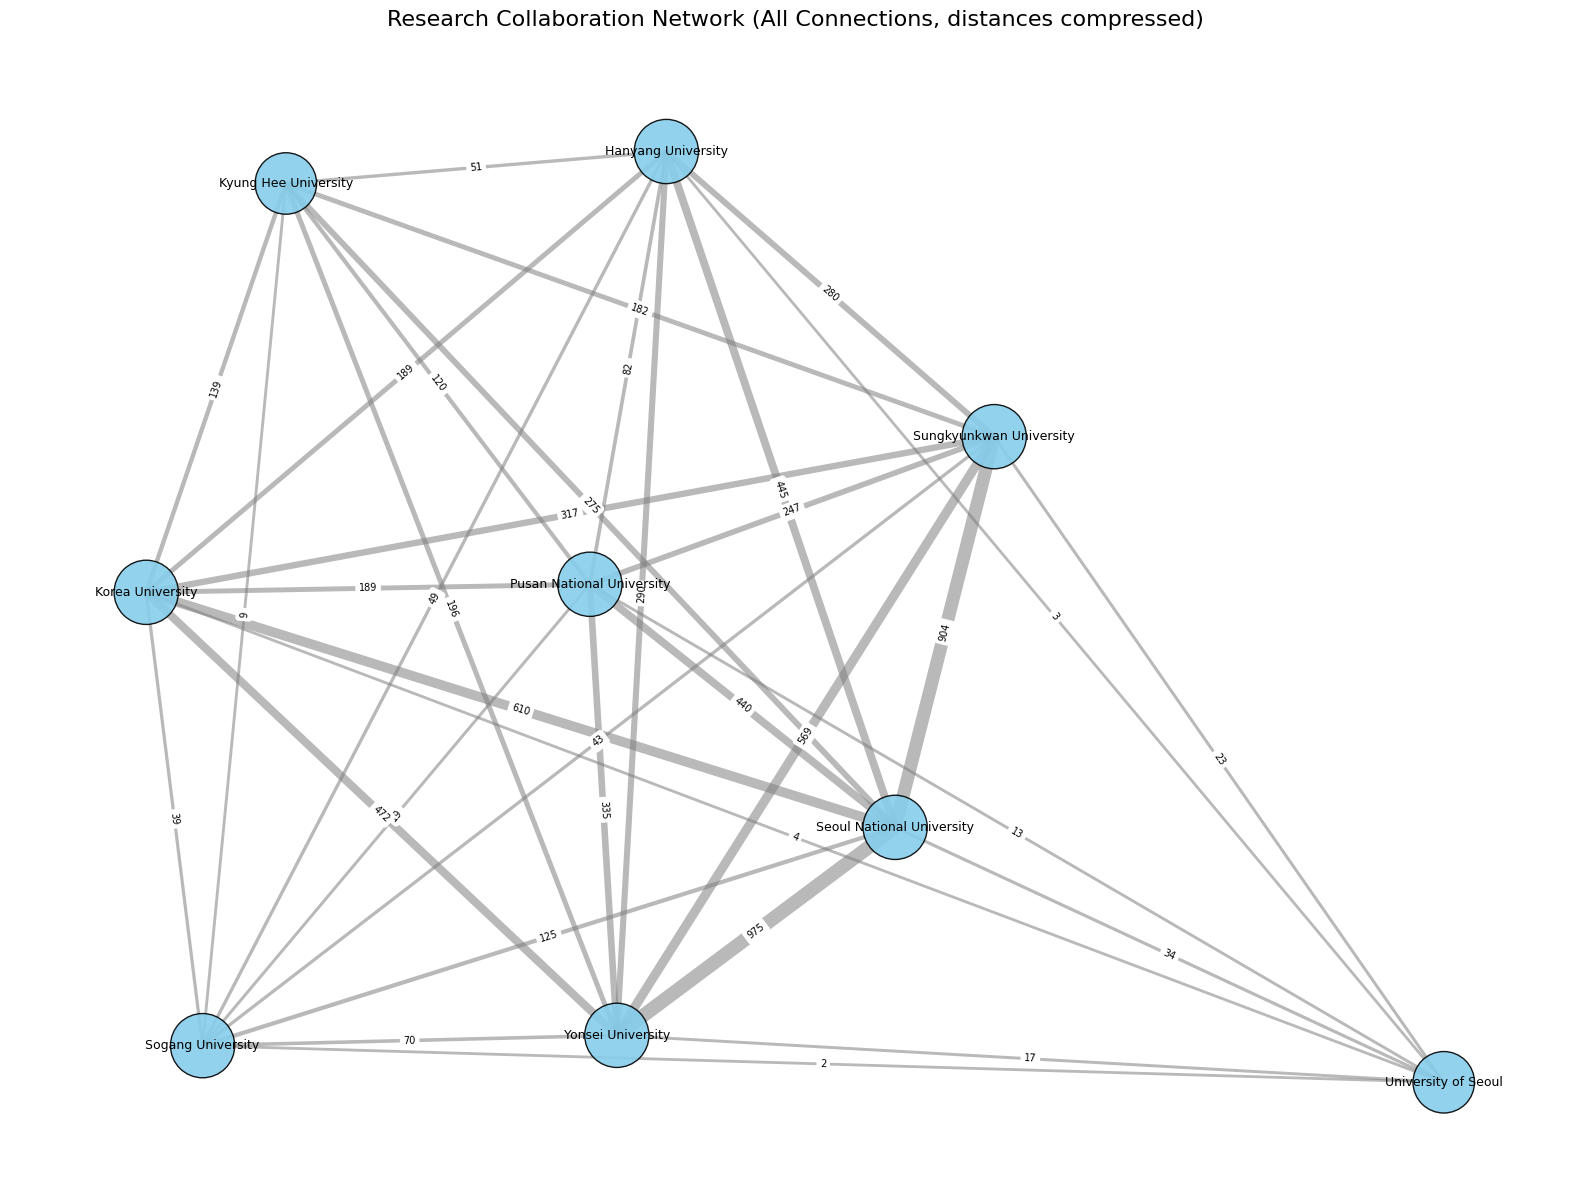

In [ ]:
# 셀 6-2: 네트워크 시각화 (전체 대상)
# 셀 6: 네트워크 시각화
import matplotlib.pyplot as plt

def visualize_collaboration_network(G):
    """협력 네트워크 시각화 (모든 대학교, 모든 연결)
    - 약한 엣지까지 모두 표시
    - 강한 관계는 너무 가깝지 않게, 약한 관계는 너무 멀지 않게 거리 범위 압축
    - 엣지 가중치가 클수록 노드가 더 가깝게 배치되도록 거리 정의
    """

    if G.number_of_nodes() == 0:
        print("시각화할 노드가 없습니다.")
        return None

    # 전체 그래프를 그대로 사용
    H = G

    # 시각화 설정
    plt.figure(figsize=(16, 12))

    # 1) 거리 정의: raw_distance = 1/weight, 이후 [d_min, d_max]로 스케일링하여 극단값 완화
    edge_weights = [H[u][v]['weight'] for u, v in H.edges()]
    if len(edge_weights) == 0:
        print("엣지가 없어 시각화할 수 없습니다.")
        return None

    raw_distances = []
    for u, v, d in H.edges(data=True):
        w = max(d.get('weight', 1), 1)
        raw_distances.append(1.0 / w)
    raw_min = min(raw_distances)
    raw_max = max(raw_distances)

    # 너무 가까운/먼 거리를 줄이기 위한 목표 범위
    d_min, d_max = 0.8, 2.2

    # 모든 엣지에 distance 속성 설정 (min-max scaling 적용)
    idx = 0
    for u, v, d in H.edges(data=True):
        raw = raw_distances[idx]
        if raw_max > raw_min:
            scaled = d_min + (raw - raw_min) * (d_max - d_min) / (raw_max - raw_min)
        else:
            scaled = (d_min + d_max) / 2.0
        d['distance'] = float(scaled)
        idx += 1

    # 2) 배치: 거리를 사용한 Kamada-Kawai로 1차 배치
    pos = nx.kamada_kawai_layout(H, weight='distance')

    # 3) 간단한 충돌 회피: 너무 가까운 노드쌍을 소폭 밀어내서 겹침 완화
    nodes = list(H.nodes())
    min_sep = 0.06  # 최소 간격 (레이아웃 좌표계)
    step = 0.02
    for _ in range(25):
        moved = False
        for i in range(len(nodes)):
            for j in range(i + 1, len(nodes)):
                a, b = nodes[i], nodes[j]
                dx = pos[b][0] - pos[a][0]
                dy = pos[b][1] - pos[a][1]
                dist = (dx * dx + dy * dy) ** 0.5
                if dist < min_sep and dist > 1e-9:
                    overlap = (min_sep - dist) / 2.0
                    ux = dx / dist
                    uy = dy / dist
                    pos[a][0] -= ux * overlap * step
                    pos[a][1] -= uy * overlap * step
                    pos[b][0] += ux * overlap * step
                    pos[b][1] += uy * overlap * step
                    moved = True
        if not moved:
            break

    # 엣지 두께: 가중치 기반 (약한 엣지도 모두 표시)
    max_weight = max(edge_weights) if edge_weights else 1
    edge_widths = [2 + 8 * (H[u][v]['weight'] / max_weight) for u, v in H.edges()]

    # 노드 색상 설정
    node_colors = []
    for node in H.nodes():
        if node == 'Seoul National University':
            node_colors.append('skyblue')
        else:
            node_colors.append('skyblue')

    # 노드 크기 설정 (연결 정도에 따라)
    node_sizes = [700 + 180 * H.degree(node) for node in H.nodes()]

    # 그래프 그리기
    nx.draw_networkx_nodes(H, pos, node_size=node_sizes, node_color=node_colors,
                          alpha=0.9, edgecolors='black', linewidths=1)
    nx.draw_networkx_edges(H, pos, width=edge_widths, alpha=0.55, edge_color='gray')
    nx.draw_networkx_labels(H, pos, font_size=9)

    # 엣지 레이블 (가중치)
    edge_labels = {(u, v): f"{d['weight']}" for u, v, d in H.edges(data=True)}
    nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels, font_size=7)

    plt.title('Research Collaboration Network (All Connections, distances compressed)', fontsize=16, pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    return H

# 네트워크 시각화
print("네트워크 시각화 중...")
H = visualize_collaboration_network(G)

네트워크 분석

In [ ]:
# 셀 7: 네트워크 분석
def analyze_network(G):
    """네트워크 분석 지표 계산"""

    print("=== 네트워크 분석 결과 ===")
    print(f"총 노드 수: {G.number_of_nodes()}")
    print(f"총 엣지 수: {G.number_of_edges()}")

    if G.number_of_nodes() > 0:
        print(f"네트워크 밀도: {nx.density(G):.4f}")

        # 연결 구성 요소 분석
        connected_components = list(nx.connected_components(G))
        print(f"연결 구성 요소 수: {len(connected_components)}")

        if connected_components:
            largest_cc = max(connected_components, key=len)
            print(f"가장 큰 구성 요소의 노드 수: {len(largest_cc)}")

        # 중심성 분석
        print("\n=== 중심성 분석 (상위 10개) ===")

        # 연결 중심성
        degree_centrality = nx.degree_centrality(G)
        top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:50]
        print("연결 중심성:")
        for node, centrality in top_degree:
            print(f"  {node}: {centrality:.4f}")

        # 가장 강한 협력 관계
        print("\n=== 가장 강한 협력 관계 ===")
        edges_with_weights = [(u, v, d['weight']) for u, v, d in G.edges(data=True)]
        top_edges = sorted(edges_with_weights, key=lambda x: x[2], reverse=True)[:50]

        for i, (u, v, w) in enumerate(top_edges, 1):
            print(f"{i}. {u} - {v}: {w} 편")

    return {
        'degree_centrality': degree_centrality if G.number_of_nodes() > 0 else {},
        'top_edges': top_edges if G.number_of_nodes() > 0 else []
    }

# 네트워크 분석 실행
analysis_results = analyze_network(G)

=== 네트워크 분석 결과 ===
총 노드 수: 9
총 엣지 수: 35
네트워크 밀도: 0.9722
연결 구성 요소 수: 1
가장 큰 구성 요소의 노드 수: 9

=== 중심성 분석 (상위 10개) ===
연결 중심성:
  Seoul National University: 1.0000
  Hanyang University: 1.0000
  Sungkyunkwan University: 1.0000
  Pusan National University: 1.0000
  Korea University: 1.0000
  Yonsei University: 1.0000
  Sogang University: 1.0000
  Kyung Hee University: 0.8750
  University of Seoul: 0.8750

=== 가장 강한 협력 관계 ===
1. Seoul National University - Yonsei University: 975 편
2. Seoul National University - Sungkyunkwan University: 904 편
3. Seoul National University - Korea University: 610 편
4. Sungkyunkwan University - Yonsei University: 569 편
5. Korea University - Yonsei University: 472 편
6. Seoul National University - Hanyang University: 445 편
7. Seoul National University - Pusan National University: 440 편
8. Pusan National University - Yonsei University: 335 편
9. Sungkyunkwan University - Korea University: 317 편
10. Hanyang University - Yonsei University: 290 편
11. Hanyang University 